In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
cd /gdrive/My\ Drive/nn

/gdrive/My Drive/nn


In [0]:
%tensorflow_version 1.x
import argparse
import os
import pickle
import sys

import numpy as np

np.random.seed(7)  # for reproducibility

import tensorflow as tf
from sklearn.model_selection import train_test_split

# tf.python.control_flow_ops = tf


from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.layers.convolutional import Conv1D
from tensorflow.python.keras.layers.pooling import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.python.keras.backend as K

import matplotlib as mpl

mpl.use('Agg')
# from keras.utils.layer_utils import print_layer_shapes


TensorFlow 1.x selected.


load local scripts 

In [0]:
import utils

Using TensorFlow backend.


In [0]:
sys.path.append(".")
from utils import precision, recall, load_data_merged

In [0]:
def create_seq_model(input_len):
    """
    Create a sequence model
    :param input_len: path to file (consist of train, valid and test data)
    """
    K.clear_session()
    #tf.random.set_seed(5005)

    input_node = Input(shape=(input_len, 4), name="input")
    conv1 = Conv1D(filters=90, kernel_size=7, padding='valid', activation="relu", name="conv1")(input_node)
    pool1 = MaxPooling1D(pool_size=4, strides=2, name="left_pool1")(conv1)
    drop1 = Dropout(0.25, name="left_drop1")(pool1)
  
    if input_len > 10:
        conv_merged = Conv1D(filters=100, kernel_size=5, padding='valid', activation="relu", name="conv_merged")(
            drop1)
        merged_pool = MaxPooling1D(pool_size=10, strides=5)(conv_merged)
        merged_drop = Dropout(0.25)(merged_pool)
        merged_flat = Flatten()(merged_drop)
    else:
        merged_flat = drop1 

    hidden1 = Dense(250, activation='relu', name="hidden1")(merged_flat)
    output = Dense(1, activation='sigmoid', name="output")(hidden1)
    model = Model(inputs=[input_node], outputs=output)
    print(model.summary())
    return model



def train_diff_model(data_path, res_path, model_name, input_len,
                     num_epoch, batchsize, model_path="./weights.hdf5"):
    """
    Training the model
    :param data_path: path to file (consist of train, valid and test data)
    :param res_path:
    :param model_name:
    :param input_len:
    :param num_epoch:
    :param batchsize:
    :param model_path:
    :return:
    """
    print('creating model')
    model = create_seq_model(input_len)
    print('compiling model')
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', precision, recall])
    checkpointer = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
    earlystopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
    # tb=TensorBoard(log_dir='./Output/logs', histogram_freq=0, write_graph=True, write_images=False)

    print('loading data')
    x_train_seq, y_train, x_valid_seq, y_valid, x_test_seq, y_test = load_data_merged(data_path, input_len)

    print('fitting the model')
    history = model.fit(x_train_seq, y_train, epochs=num_epoch, batch_size=batchsize,
                        validation_data=(x_valid_seq, y_valid), verbose=2,
                        callbacks=[checkpointer, earlystopper, ])  # tb])

    print('saving the model')
    model.save(os.path.join(res_path, model_name + ".h5"))

    print('testing the model')
    score = model.evaluate(x_test_seq, y_test)

    print(model.metrics_names)
    for i in range(len(model.metrics_names)):
        print(str(model.metrics_names[i]) + ": " + str(score[i]))

    print("{}: {:.2f}".format(model.metrics_names[0], score[0]))
    print("{}: {:.2f}".format(model.metrics_names[1], score[1]))
    print("{}: {:.2f}".format(model.metrics_names[2], score[2]))


In [0]:
train_diff_model(data_path=r"dataset/classifier_data_ccpg1.pkl", res_path=".", model_name="test",
                     input_len=150, num_epoch=2, batchsize=32,
                     model_path="model")

creating model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 150, 4)]          0         
_________________________________________________________________
conv1 (Conv1D)               (None, 144, 90)           2610      
_________________________________________________________________
left_pool1 (MaxPooling1D)    (None, 71, 90)            0         
_________________________________________________________________
left_drop1 (Dropout)         (None, 71, 90)            0         
_________________________________________________________________
conv_merged (Conv1D)         (None, 67, 100)           45100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 100)           0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 100)  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

**Interpet **

In [0]:
!pip install concise


In [0]:
import plotseqlogo
import  IntegratedGradients
from plotseqlogo import *
from IntegratedGradients import *
from utils import *


2020-04-04 14:48:26,645 [INFO] Generating grammar tables from /usr/lib/python3.6/lib2to3/Grammar.txt
2020-04-04 14:48:26,668 [INFO] Generating grammar tables from /usr/lib/python3.6/lib2to3/PatternGrammar.txt


2020-04-04 14:48:27,144 [WARNING] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/gdrive/My Drive/nn/plotseqlogo.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/gdrive/My Drive/nn/plotseqlogo.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [0]:

model = load_model("saved_model",custom_objects={'precision': precision,'recall': recall })

In [0]:
gradients = integrated_gradients(model) 

Evaluated output channel (0-based index): All
Building gradient functions
Progress: 100.0%
Done.


In [0]:
x_train_seq, y_train, x_valid_seq, y_valid, x_test_seq, y_test = load_data_merged(r"dataset/classifier_data_ccpg1.pkl", 150, True)

In [0]:
samples = []
numsteps = []
step_sizes = []

# _output = gradients.linearly_interpolate(x_test_seq[10])
# samples.append(_output[0])
# numsteps.append(_output[1])
# step_sizes.append(_output[2])

for i in range(1000):
  _output = integrated_gradients.linearly_interpolate(x_test_seq[i], False, 50)
  samples.append(_output[0])
  numsteps.append(_output[1])
  step_sizes.append(_output[2])



_input = []
for s in samples:
    _input.append(s)
_input.append(0)

In [0]:
session = K.get_session()
init = tf.global_variables_initializer()
session.run(init)
with session.as_default():
    with session.graph.as_default():
        gradients = gradients.get_gradients[0](_input)

explanation = []
for i in range(len(gradients)):
    _temp = np.sum(gradients[i], axis=0)
    explanation.append(np.multiply(_temp, step_sizes[i]))


In [0]:
ex_seq = np.array(explanation[0])

In [0]:
type(explanation)

list

/gdrive/My Drive/nn/plotseqlogo.py:150: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])


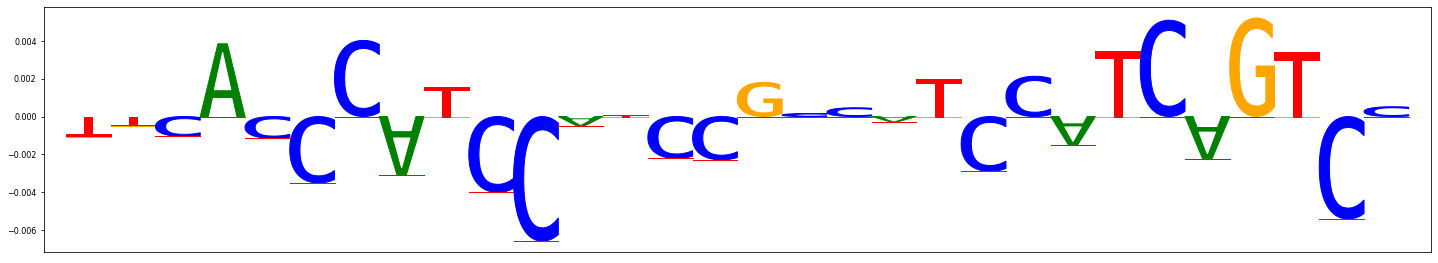

In [0]:
seqlogo_fig(ex_seq[60:90,:], figsize=(20, 4), ncol=1)

In [0]:
ex_seq